##  Initial data exploration on CBP data

## Importing required Packages

In [5]:
#Importing the required packages
import os
import math
import numpy as np
import pandas as pd
import datetime
os.chdir(r"C:\Users\Yashu Dhatrika\Desktop\CNS\CDC Prescription")

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
#from mpl_toolkits.mplot3d import Axes3D

## Loading the data and Checking the size of data

In [7]:
cpb_county = pd.read_csv('CBP data.csv',encoding = "utf-8")


# Displaying the size of the Dataframe in Memory
def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("Bytes", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])
print('CBP data County level',convert_size(cpb_county.memory_usage().sum()))



CBP data County level 1.07 MB


## Dropping the variable which represents unique key or contains majority of repetitive values

In [16]:
#%% Dropping all the variable, if it is kinda key (contains unique value for each record or have only few distinct value)
def unnes(table):
    for col in table.columns:
        if len(table[col].unique())/len(table)<0.05 or len(table[col].unique())/len(table)>0.95:
            table.drop(col,inplace=True,axis=1)
            
unnes(cpb_county)



        

## What datatypes are in dataframe and retrieving the top records

In [15]:
# Different data types in the dataset
print(cpb_county.dtypes)
cpb_county['countyfips']=cpb_county['countyfips'].astype(str)

# Describing all the Numerical Features
print(cpb_county.describe())

# Describing all the Categorical Features
print(cpb_county.describe(include=['O']))

# Let's have a quick look at our data
print(cpb_county.head())




year           int64
countyfips     int64
State         object
est            int64
naics          int64
dtype: object
               year           est          naics
count  27962.000000  27962.000000   27962.000000
mean    2012.512910      5.070989  622135.988127
std        2.295363     11.703916     828.694766
min     2009.000000      1.000000  621420.000000
25%     2011.000000      1.000000  621420.000000
50%     2013.000000      2.000000  621420.000000
75%     2015.000000      4.000000  623220.000000
max     2016.000000    313.000000  623220.000000
       countyfips  State
count       27962  27773
unique       2375     51
top          1055     TX
freq           24   1257
   year countyfips State  est   naics
0  2009       1003    AL    3  623220
1  2010       1003    AL    3  623220
2  2012       1003    AL    1  623220
3  2013       1003    AL    1  623220
4  2014       1003    AL    1  623220


## Data Exploration - Univariate
When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between. Let's start with some simple Univariate (one feature) analysis.

Features can be of multiple types:Nominal,Ordinal,Interval, Ratio
There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types:

Numerical: any feature that contains numeric values.
Categorical: any feature that contains categories, or text.

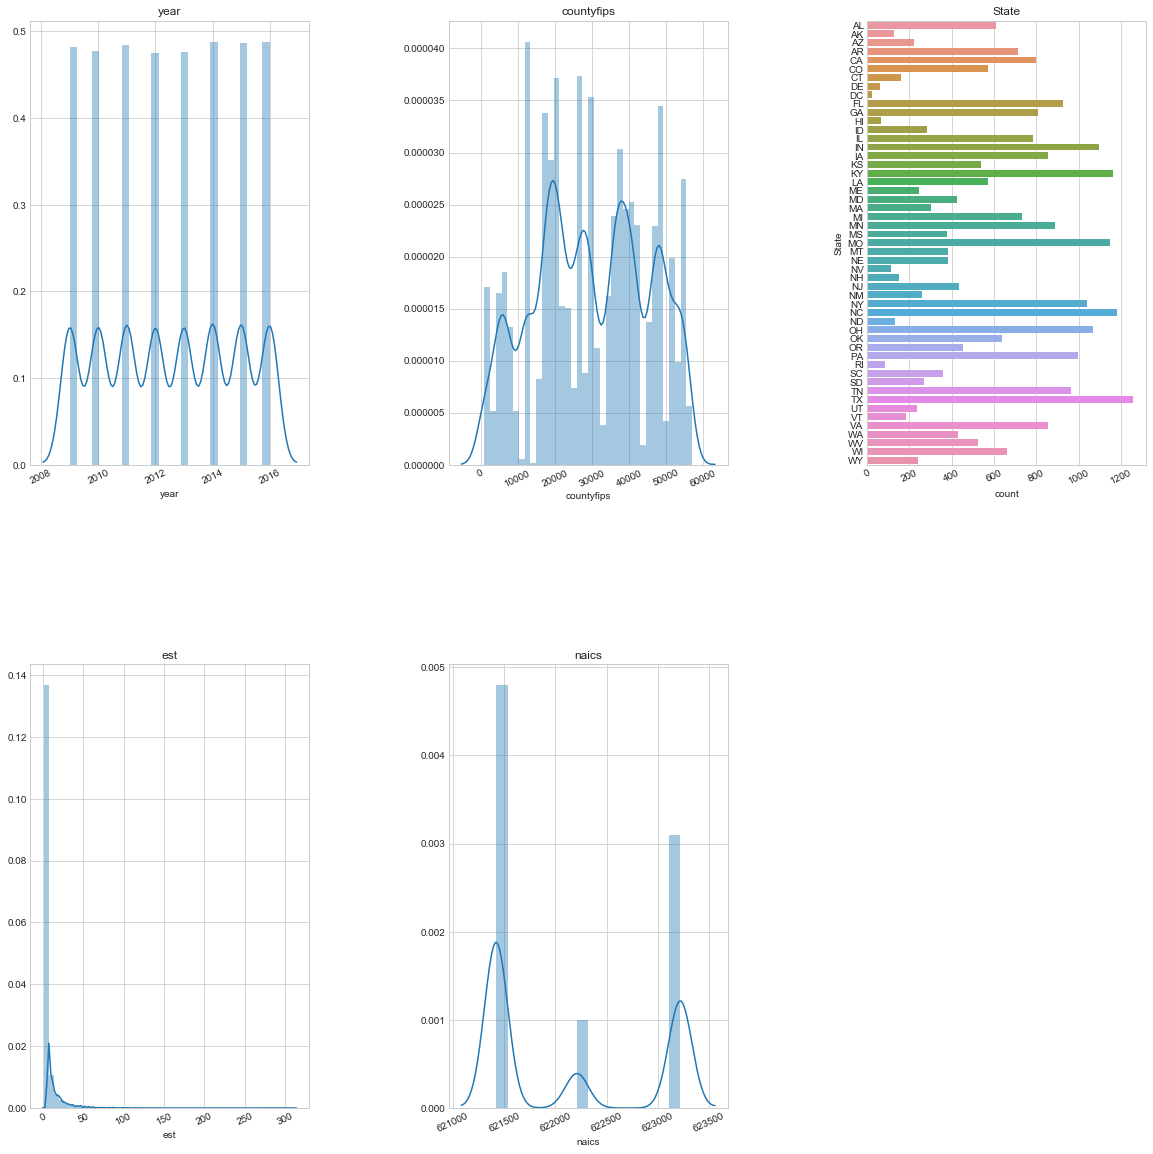

In [10]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(cpb_county, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)




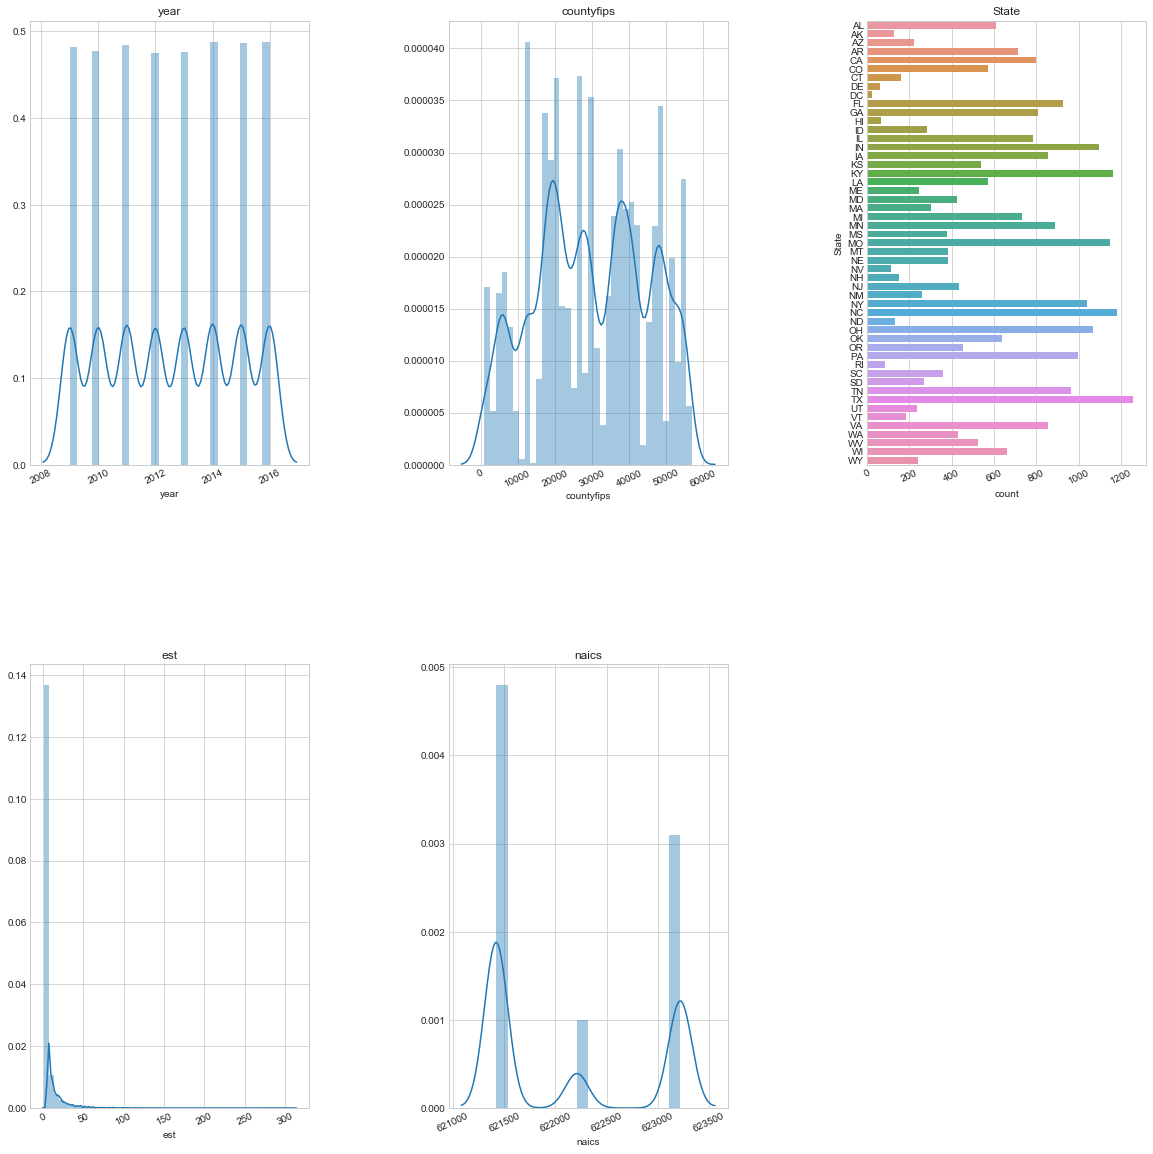

In [12]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
cpb_county_after=cpb_county.fillna(cpb_county.mean())    
plot_distribution(cpb_county_after, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)



## What missing values are there?

year            0
countyfips      0
State         189
est             0
naics           0
dtype: int64

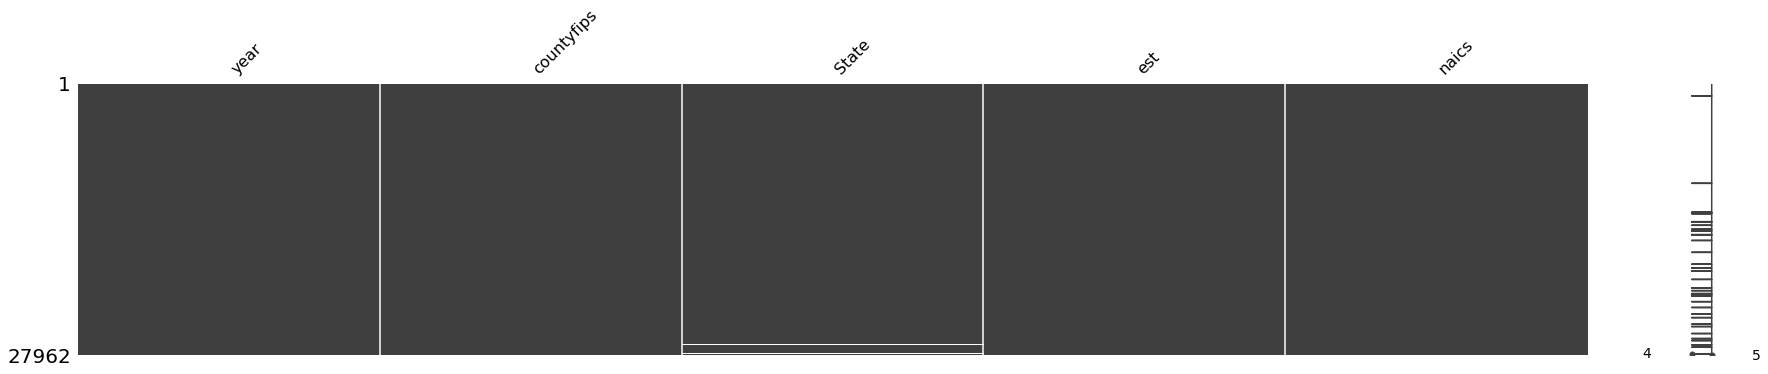

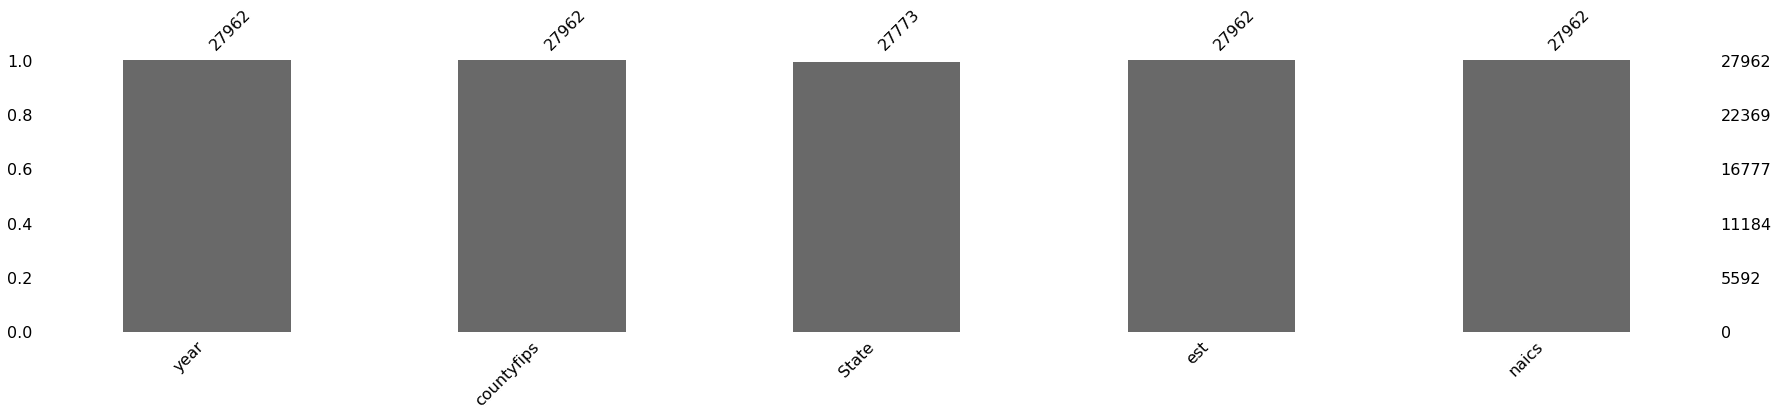

In [9]:
# How many missing values are there in our dataset?
missingno.matrix(cpb_county, figsize = (30,5))

missingno.bar(cpb_county, sort='ascending', figsize = (30,5))

## Tabbular format

cpb_county.isnull().sum()